In [7]:
# Convert cases and deaths to numeric
import pandas as pd
gdf["cases"] = pd.to_numeric(gdf["cases"], errors="coerce")
gdf["deaths"] = pd.to_numeric(gdf["deaths"], errors="coerce")


In [8]:
print(gdf.dtypes)
gdf[["cases", "deaths"]].isna().sum()


GID_1          object
GID_0          object
COUNTRY        object
state_std      object
VARNAME_1      object
NL_NAME_1      object
TYPE_1         object
ENGTYPE_1      object
CC_1           object
HASC_1         object
ISO_1          object
state          object
year          float64
cases         float64
deaths        float64
geometry     geometry
dtype: object


cases     19
deaths    19
dtype: int64

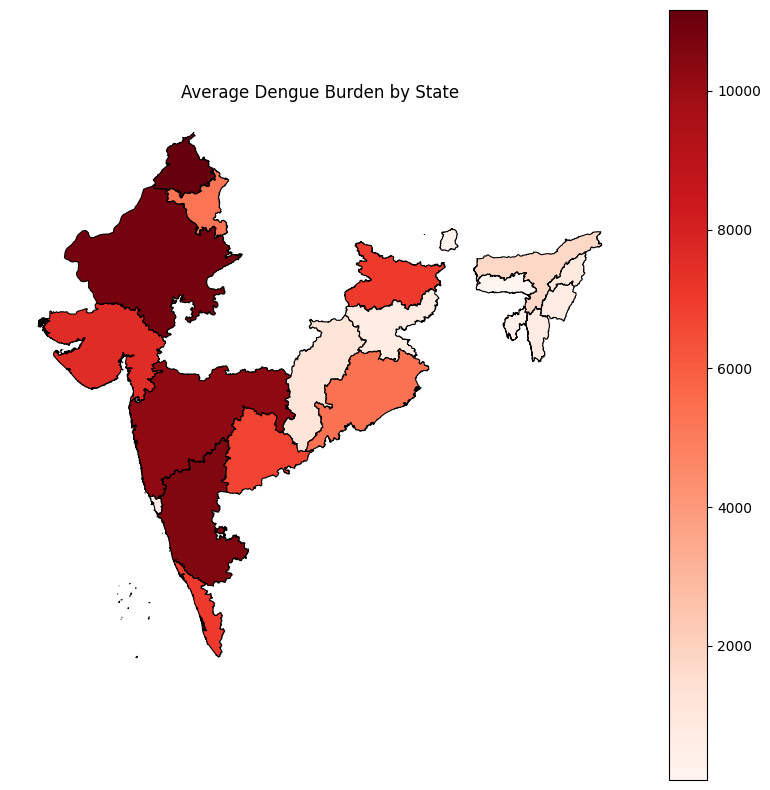

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.read_file("../data/processed/india_dengue_state_year.geojson")

# FIX: enforce numeric
gdf["cases"] = pd.to_numeric(gdf["cases"], errors="coerce")

# Average cases per state
avg_cases = gdf.groupby("state")["cases"].mean().reset_index()

# Merge back
gdf_avg = gdf.merge(avg_cases, on="state", suffixes=("", "_avg"))
gdf_avg = gdf_avg.drop_duplicates(subset="state")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_avg.plot(
    column="cases_avg",
    cmap="Reds",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True
)

ax.set_title("Average Dengue Burden by State")
ax.axis("off")
plt.show()
